In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('final2.csv')

In [6]:
df

,location,State.x,County,X..Smokers,X..Adults.with.Obesity,X..Physically.Inactive,X..With.Access.to.Exercise.Opportunities,X..Excessive.Drinking,X..Uninsured,Primary.Care.Physicians.Ratio,Mental.Health.Provider.Ratio,X..Vaccinated,X..Unemployed,X..Children.in.Poverty,Average.Daily.PM2.5,X,State.y,Life.Expectancy,Premature.age.adjusted.mortality,Age.Adjusted.Death.Rate,Child.Mortality.Rate,Infant.Mortality.Rate,Frequent.Physical.Distress,Frequent.Mental.Distress,Adults.with.Diabetes,HIV.Prevalence.Rate,Food.Insecure,Limited.Access.to.Healthy.Foods,Insufficient.Sleep,Uninsured.adults,Other.Primary.Care.Provider.Ratio,Median.Household.Income,Suicide.Rate..Age.Adjusted.,Average.Traffic.Volume.per.Meter.of.Major.Roadways,Population,less.than.18.years.of.age,pp.65.and.over,mean,sd,median,days,agg
0,Alabama Baldwin,Alabama,Baldwin,17,31,27,74,18,11,1372:1,1038:1,44,3.6,14,10.3,1,Alabama,78.5,2967.0,353.0,47.0,6.0,12,13,11,167.0,12,5.0,33,14,1787:01:00,57588,19.0,87,218022,21.6,20.4,8.469723,3.717850,7.700000,1156,9791.000000
1,Alabama Clay,Alabama,Clay,20,41,33,64,13,14,2673:1,6638:1,43,3.9,26,10.6,2,Alabama,75.2,275.0,531.0,NaN,NaN,15,16,14,174.0,15,2.0,39,17,2213:01:00,39201,23.0,37,13275,20.2,20.7,8.501128,4.035936,7.850000,1152,9793.300000
2,Alabama Colbert,Alabama,Colbert,19,31,37,56,15,10,1557:1,2882:1,45,4.6,21,10.7,3,Alabama,74.7,1044.0,510.0,67.0,9.0,14,14,16,100.0,15,7.0,37,12,693:01:00,49055,18.0,81,54762,20.8,19.9,9.578972,4.527557,8.900000,1806,17299.623420
3,Alabama DeKalb,Alabama,DeKalb,21,29,32,45,12,17,2387:1,3757:1,40,3.8,30,11.3,4,Alabama,74.5,1302.0,514.0,62.0,7.0,16,16,13,88.0,12,2.0,36,23,1741:01:00,39491,19.0,53,71385,24.1,17.3,8.941140,4.088672,8.400000,1123,10040.900000
4,Alabama Etowah,Alabama,Etowah,20,36,34,49,14,12,1238:1,827:1,36,4.1,29,11.5,5,Alabama,73.0,2201.0,571.0,73.0,8.0,15,15,16,187.0,15,9.0,41,16,1281:01:00,44903,16.0,140,102501,21.5,19.0,11.927889,17.165517,10.872916,4226,50407.257270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,Wyoming Sheridan,Wyoming,Sheridan,15,28,24,89,22,13,1439:1,207:1,40,4.0,11,5.7,832,Wyoming,78.2,437.0,361.0,54.0,NaN,10,11,10,28.0,12,11.0,31,16,840:01:00,58307,26.0,100,30233,21.4,21.0,6.617794,5.534461,5.000000,3274,21666.655990
832,Wyoming Sublette,Wyoming,Sublette,14,30,22,48,19,15,1960:1,1227:1,42,4.2,7,5.1,833,Wyoming,82.9,97.0,264.0,NaN,NaN,9,10,9,NaN,10,4.0,29,16,1402:01:00,74570,38.0,39,9813,22.5,19.5,4.280370,4.845895,3.400000,13169,56368.194530
833,Wyoming Sweetwater,Wyoming,Sweetwater,18,30,25,90,23,14,2721:1,395:1,41,4.2,10,5.1,834,Wyoming,77.3,532.0,384.0,34.0,NaN,10,11,9,73.0,11,11.0,31,17,1485:01:00,73315,22.0,155,43051,26.2,12.1,4.084948,3.815029,3.300000,2104,8594.729703
834,Wyoming Teton,Wyoming,Teton,15,12,12,100,26,16,862:1,210:1,51,3.0,7,4.9,835,Wyoming,89.5,109.0,128.0,NaN,NaN,9,10,2,65.0,10,7.0,27,18,923:01:00,99087,12.0,135,23081,18.4,15.4,3.368026,3.842819,2.416667,5480,18456.784710


In [7]:
df["Mental.Health.Provider.Ratio"]

0      1038:1
1      6638:1
2      2882:1
3      3757:1
4       827:1
        ...  
831     207:1
832    1227:1
833     395:1
834     210:1
835     581:1
Name: Mental.Health.Provider.Ratio, Length: 836, dtype: object

In [8]:
df.pop("Primary.Care.Physicians.Ratio")
df.pop("Mental.Health.Provider.Ratio")



0      1038:1
1      6638:1
2      2882:1
3      3757:1
4       827:1
        ...  
831     207:1
832    1227:1
833     395:1
834     210:1
835     581:1
Name: Mental.Health.Provider.Ratio, Length: 836, dtype: object

In [9]:
df.pop("Other.Primary.Care.Provider.Ratio")

0      1787:01:00
1      2213:01:00
2       693:01:00
3      1741:01:00
4      1281:01:00
          ...    
831     840:01:00
832    1402:01:00
833    1485:01:00
834     923:01:00
835    1393:01:00
Name: Other.Primary.Care.Provider.Ratio, Length: 836, dtype: object

In [24]:
df.pop("state.y")

0      Alabama
1      Alabama
2      Alabama
3      Alabama
4      Alabama
        ...   
831    Wyoming
832    Wyoming
833    Wyoming
834    Wyoming
835    Wyoming
Name: state.y, Length: 836, dtype: object

In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '') #rename our columns


In [23]:
df.columns

Index(['location', 'state.x', 'county', 'x..smokers', 'x..adults.with.obesity',
       'x..physically.inactive', 'x..with.access.to.exercise.opportunities',
       'x..excessive.drinking', 'x..uninsured', 'x..vaccinated',
       'x..unemployed', 'x..children.in.poverty', 'average.daily.pm2.5', 'x',
       'state.y', 'life.expectancy', 'premature.age.adjusted.mortality',
       'age.adjusted.death.rate', 'child.mortality.rate',
       'infant.mortality.rate', 'frequent.physical.distress',
       'frequent.mental.distress', 'adults.with.diabetes',
       'hiv.prevalence.rate', 'food.insecure',
       'limited.access.to.healthy.foods', 'insufficient.sleep',
       'uninsured.adults', 'median.household.income',
       'suicide.rate..age.adjusted.',
       'average.traffic.volume.per.meter.of.major.roadways', 'population',
       'less.than.18.years.of.age', 'pp.65.and.over', 'mean', 'sd', 'median',
       'days', 'agg'],
      dtype='object')

In [13]:
print(df.nunique())

location                                              836
state.x                                                49
county                                                656
x..smokers                                             21
x..adults.with.obesity                                 34
x..physically.inactive                                 32
x..with.access.to.exercise.opportunities               81
x..excessive.drinking                                  20
x..uninsured                                           28
x..vaccinated                                          48
x..unemployed                                          71
x..children.in.poverty                                 42
average.daily.pm2.5                                   111
x                                                     836
state.y                                                49
life.expectancy                                       140
premature.age.adjusted.mortality                      761
age.adjusted.d

No columns have only one value

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [22]:
df.dtypes

location                                               object
state.x                                                object
county                                                 object
x..smokers                                              int64
x..adults.with.obesity                                  int64
x..physically.inactive                                  int64
x..with.access.to.exercise.opportunities                int64
x..excessive.drinking                                   int64
x..uninsured                                            int64
x..vaccinated                                           int64
x..unemployed                                         float64
x..children.in.poverty                                  int64
average.daily.pm2.5                                   float64
x                                                       int64
state.y                                                object
life.expectancy                                       float64
prematur

In [15]:
df.dtypes

location                                               object
state.x                                                object
county                                                 object
x..smokers                                              int64
x..adults.with.obesity                                  int64
x..physically.inactive                                  int64
x..with.access.to.exercise.opportunities                int64
x..excessive.drinking                                   int64
x..uninsured                                            int64
x..vaccinated                                           int64
x..unemployed                                         float64
x..children.in.poverty                                  int64
average.daily.pm2.5                                   float64
x                                                       int64
state.y                                                object
life.expectancy                                       float64
prematur

In [27]:
data = df.values

In [17]:
df.shape

(836, 39)

In [35]:
df.iloc[:,3:]

,x..smokers,x..adults.with.obesity,x..physically.inactive,x..with.access.to.exercise.opportunities,x..excessive.drinking,x..uninsured,x..vaccinated,x..unemployed,x..children.in.poverty,average.daily.pm2.5,x,life.expectancy,premature.age.adjusted.mortality,age.adjusted.death.rate,child.mortality.rate,infant.mortality.rate,frequent.physical.distress,frequent.mental.distress,adults.with.diabetes,hiv.prevalence.rate,food.insecure,limited.access.to.healthy.foods,insufficient.sleep,uninsured.adults,median.household.income,suicide.rate..age.adjusted.,average.traffic.volume.per.meter.of.major.roadways,population,less.than.18.years.of.age,pp.65.and.over,mean,sd,median,days,agg
0,17,31,27,74,18,11,44,3.6,14,10.3,1,78.5,2967.0,353.0,47.0,6.0,12,13,11,167.0,12,5.0,33,14,57588,19.0,87,218022,21.6,20.4,8.469723,3.717850,7.700000,1156,9791.000000
1,20,41,33,64,13,14,43,3.9,26,10.6,2,75.2,275.0,531.0,NaN,NaN,15,16,14,174.0,15,2.0,39,17,39201,23.0,37,13275,20.2,20.7,8.501128,4.035936,7.850000,1152,9793.300000
2,19,31,37,56,15,10,45,4.6,21,10.7,3,74.7,1044.0,510.0,67.0,9.0,14,14,16,100.0,15,7.0,37,12,49055,18.0,81,54762,20.8,19.9,9.578972,4.527557,8.900000,1806,17299.623420
3,21,29,32,45,12,17,40,3.8,30,11.3,4,74.5,1302.0,514.0,62.0,7.0,16,16,13,88.0,12,2.0,36,23,39491,19.0,53,71385,24.1,17.3,8.941140,4.088672,8.400000,1123,10040.900000
4,20,36,34,49,14,12,36,4.1,29,11.5,5,73.0,2201.0,571.0,73.0,8.0,15,15,16,187.0,15,9.0,41,16,44903,16.0,140,102501,21.5,19.0,11.927889,17.165517,10.872916,4226,50407.257270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,15,28,24,89,22,13,40,4.0,11,5.7,832,78.2,437.0,361.0,54.0,NaN,10,11,10,28.0,12,11.0,31,16,58307,26.0,100,30233,21.4,21.0,6.617794,5.534461,5.000000,3274,21666.655990
832,14,30,22,48,19,15,42,4.2,7,5.1,833,82.9,97.0,264.0,NaN,NaN,9,10,9,NaN,10,4.0,29,16,74570,38.0,39,9813,22.5,19.5,4.280370,4.845895,3.400000,13169,56368.194530
833,18,30,25,90,23,14,41,4.2,10,5.1,834,77.3,532.0,384.0,34.0,NaN,10,11,9,73.0,11,11.0,31,17,73315,22.0,155,43051,26.2,12.1,4.084948,3.815029,3.300000,2104,8594.729703
834,15,12,12,100,26,16,51,3.0,7,4.9,835,89.5,109.0,128.0,NaN,NaN,9,10,2,65.0,10,7.0,27,18,99087,12.0,135,23081,18.4,15.4,3.368026,3.842819,2.416667,5480,18456.784710


In [28]:
X = data[:,3:] #VALUES WITHOUT LOCATION, STATE COUNTY

In [29]:
X.shape

(836, 35)

In [20]:
transform = VarianceThreshold()

In [30]:
X_sel = transform.fit_transform(X)

In [31]:
print(X_sel.shape) #did not remove any columns

(836, 35)


In [32]:
from matplotlib import pyplot

>Threshold=0.00, Features=35
>Threshold=0.05, Features=35
>Threshold=0.10, Features=35
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=35
>Threshold=0.50, Features=35


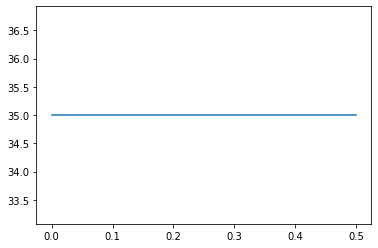

In [33]:
thresholds = np.arange(0.0, 0.55, 0.05)
results = list()
for t in thresholds:
# define the transform
    transform = VarianceThreshold(threshold=t)
# transform the input data
    X_sel = transform.fit_transform(X)
# determine the number of input features
    n_features = X.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
# store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

In [ ]:
X[0]

array([17, 31, 27, 74, 18, 11, 44, 3.6, 14, 10.3, 1, 78.5, 2967.0, 353.0,
       47.0, 6.0, 12, 13, 11, 167.0, 12, 5.0, 33, 14, 57588, 19.0, 87,
       218022, 21.6, 20.4, 8.469723183, 3.717849808, 7.7, 1156, 9791.0],
      dtype=object)

In [ ]:
outliers=[x for x in X[0] if x < lower or x > upper]


In [ ]:
X[1,1].dtype

AttributeError: 'int' object has no attribute 'dtype'

In [ ]:
cut_off = data_std *3

In [ ]:
cleaned=[]
for i in range (len(X)):
    data_mean=np.mean(X[:,i])
    data_std=np.std(X[:,i])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers=[x for x in X[i] if x < lower or x > upper]
    clean=[x for x in X[i] if x > lower and x < upper]
    print('Identified outliers: %d' % len(outliers))
    print('Non-outlier observations: %d' % len(clean))

Identified outliers: 20
Non-outlier observations: 15
Identified outliers: 19
Non-outlier observations: 14
Identified outliers: 16
Non-outlier observations: 19
Identified outliers: 24
Non-outlier observations: 11
Identified outliers: 19
Non-outlier observations: 16
Identified outliers: 15
Non-outlier observations: 20
Identified outliers: 29
Non-outlier observations: 6
Identified outliers: 28
Non-outlier observations: 6
Identified outliers: 12
Non-outlier observations: 23
Identified outliers: 0
Non-outlier observations: 0
Identified outliers: 5
Non-outlier observations: 30
Identified outliers: 0
Non-outlier observations: 0
Identified outliers: 0
Non-outlier observations: 0
Identified outliers: 0
Non-outlier observations: 0
Identified outliers: 0
Non-outlier observations: 0
Identified outliers: 0
Non-outlier observations: 0
Identified outliers: 20
Non-outlier observations: 15
Identified outliers: 23
Non-outlier observations: 12
Identified outliers: 20
Non-outlier observations: 15
Identifi

IndexError: index 35 is out of bounds for axis 1 with size 35

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)

In [ ]:
location=df.pop("location")
df.pop("State.x")
df.pop("County")
for i in range(df.shape[1]):
# count number of rows with missing values
    n_miss = df[[i]].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

In [ ]:
df.dtypes

In [ ]:
Y = df.iloc[:,3:]
Y
print(" \nCount total NaN at each column in a DataFrame : \n\n", Y.isnull().sum()) 

In [57]:
data = df.values
data

array([['Alabama Baldwin', 'Alabama', 'Baldwin', ..., 7.7, 1156, 9791.0],
       ['Alabama Clay', 'Alabama', 'Clay', ..., 7.85, 1152, 9793.3],
       ['Alabama Colbert', 'Alabama', 'Colbert', ..., 8.9, 1806,
        17299.62342],
       ...,
       ['Wyoming Sweetwater', 'Wyoming', 'Sweetwater', ..., 3.3, 2104,
        8594.729703],
       ['Wyoming Teton', 'Wyoming', 'Teton', ..., 2.416667, 5480,
        18456.78471],
       ['Wyoming Weston', 'Wyoming', 'Weston', ..., 3.5, 847,
        3430.675967]], dtype=object)

In [64]:
Y = df.iloc[:,3:]
Y
X= Y.values
X

array([[1.70000000e+01, 3.10000000e+01, 2.70000000e+01, ...,
        7.70000000e+00, 1.15600000e+03, 9.79100000e+03],
       [2.00000000e+01, 4.10000000e+01, 3.30000000e+01, ...,
        7.85000000e+00, 1.15200000e+03, 9.79330000e+03],
       [1.90000000e+01, 3.10000000e+01, 3.70000000e+01, ...,
        8.90000000e+00, 1.80600000e+03, 1.72996234e+04],
       ...,
       [1.80000000e+01, 3.00000000e+01, 2.50000000e+01, ...,
        3.30000000e+00, 2.10400000e+03, 8.59472970e+03],
       [1.50000000e+01, 1.20000000e+01, 1.20000000e+01, ...,
        2.41666700e+00, 5.48000000e+03, 1.84567847e+04],
       [1.70000000e+01, 3.30000000e+01, 2.70000000e+01, ...,
        3.50000000e+00, 8.47000000e+02, 3.43067597e+03]])

In [65]:
from numpy import isnan
X= Y.values
# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))

Missing: 560


In [66]:

from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


In [74]:
Xtrans

array([[1.70000000e+01, 3.10000000e+01, 2.70000000e+01, ...,
        7.70000000e+00, 1.15600000e+03, 9.79100000e+03],
       [2.00000000e+01, 4.10000000e+01, 3.30000000e+01, ...,
        7.85000000e+00, 1.15200000e+03, 9.79330000e+03],
       [1.90000000e+01, 3.10000000e+01, 3.70000000e+01, ...,
        8.90000000e+00, 1.80600000e+03, 1.72996234e+04],
       ...,
       [1.80000000e+01, 3.00000000e+01, 2.50000000e+01, ...,
        3.30000000e+00, 2.10400000e+03, 8.59472970e+03],
       [1.50000000e+01, 1.20000000e+01, 1.20000000e+01, ...,
        2.41666700e+00, 5.48000000e+03, 1.84567847e+04],
       [1.70000000e+01, 3.30000000e+01, 2.70000000e+01, ...,
        3.50000000e+00, 8.47000000e+02, 3.43067597e+03]])

In [71]:
df2 = pd.DataFrame(Xtrans, index=range(Xtrans.shape[0]),
                          columns=range(Xtrans.shape[1]))
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,17.0,31.0,27.0,74.0,18.0,11.0,44.0,3.6,14.0,10.3,1.0,78.5,2967.0,353.0,47.000000,6.000000,12.0,13.0,11.0,167.000000,12.0,5.0,33.0,14.0,57588.0,19.000000,87.0,218022.0,21.6,20.4,8.469723,3.717850,7.700000,1156.0,9791.000000
1,20.0,41.0,33.0,64.0,13.0,14.0,43.0,3.9,26.0,10.6,2.0,75.2,275.0,531.0,54.959155,6.267537,15.0,16.0,14.0,174.000000,15.0,2.0,39.0,17.0,39201.0,23.000000,37.0,13275.0,20.2,20.7,8.501128,4.035936,7.850000,1152.0,9793.300000
2,19.0,31.0,37.0,56.0,15.0,10.0,45.0,4.6,21.0,10.7,3.0,74.7,1044.0,510.0,67.000000,9.000000,14.0,14.0,16.0,100.000000,15.0,7.0,37.0,12.0,49055.0,18.000000,81.0,54762.0,20.8,19.9,9.578972,4.527557,8.900000,1806.0,17299.623420
3,21.0,29.0,32.0,45.0,12.0,17.0,40.0,3.8,30.0,11.3,4.0,74.5,1302.0,514.0,62.000000,7.000000,16.0,16.0,13.0,88.000000,12.0,2.0,36.0,23.0,39491.0,19.000000,53.0,71385.0,24.1,17.3,8.941140,4.088672,8.400000,1123.0,10040.900000
4,20.0,36.0,34.0,49.0,14.0,12.0,36.0,4.1,29.0,11.5,5.0,73.0,2201.0,571.0,73.000000,8.000000,15.0,15.0,16.0,187.000000,15.0,9.0,41.0,16.0,44903.0,16.000000,140.0,102501.0,21.5,19.0,11.927889,17.165517,10.872916,4226.0,50407.257270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,15.0,28.0,24.0,89.0,22.0,13.0,40.0,4.0,11.0,5.7,832.0,78.2,437.0,361.0,54.000000,6.267537,10.0,11.0,10.0,28.000000,12.0,11.0,31.0,16.0,58307.0,26.000000,100.0,30233.0,21.4,21.0,6.617794,5.534461,5.000000,3274.0,21666.655990
832,14.0,30.0,22.0,48.0,19.0,15.0,42.0,4.2,7.0,5.1,833.0,82.9,97.0,264.0,54.959155,6.267537,9.0,10.0,9.0,224.065997,10.0,4.0,29.0,16.0,74570.0,38.000000,39.0,9813.0,22.5,19.5,4.280370,4.845895,3.400000,13169.0,56368.194530
833,18.0,30.0,25.0,90.0,23.0,14.0,41.0,4.2,10.0,5.1,834.0,77.3,532.0,384.0,34.000000,6.267537,10.0,11.0,9.0,73.000000,11.0,11.0,31.0,17.0,73315.0,22.000000,155.0,43051.0,26.2,12.1,4.084948,3.815029,3.300000,2104.0,8594.729703
834,15.0,12.0,12.0,100.0,26.0,16.0,51.0,3.0,7.0,4.9,835.0,89.5,109.0,128.0,54.959155,6.267537,9.0,10.0,2.0,65.000000,10.0,7.0,27.0,18.0,99087.0,12.000000,135.0,23081.0,18.4,15.4,3.368026,3.842819,2.416667,5480.0,18456.784710


In [75]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error 
from sklearn.compose import ColumnTransformer
lof = LocalOutlierFactor()

Y = Xtrans
lof = LocalOutlierFactor()
yhat = lof.fit_predict(Y)
print(yhat)
# select all rows that are not outliers  
outliers = yhat == -1
mask = yhat != -1
Y[outliers, :]


[ 1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1
  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1 -1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

array([[1.80000000e+01, 3.50000000e+01, 3.00000000e+01, ...,
        9.70000000e+00, 5.46390000e+04, 5.72795240e+05],
       [1.40000000e+01, 2.70000000e+01, 2.00000000e+01, ...,
        7.15416700e+00, 5.87940000e+04, 5.01416740e+05],
       [1.40000000e+01, 2.70000000e+01, 2.20000000e+01, ...,
        7.70833300e+00, 2.25390000e+04, 2.20367711e+05],
       ...,
       [1.40000000e+01, 3.50000000e+01, 2.30000000e+01, ...,
        5.90000000e+00, 2.68890000e+04, 2.39742465e+05],
       [1.40000000e+01, 2.80000000e+01, 2.10000000e+01, ...,
        8.10000000e+00, 1.17000000e+02, 1.07520000e+03],
       [1.50000000e+01, 1.20000000e+01, 1.20000000e+01, ...,
        2.41666700e+00, 5.48000000e+03, 1.84567847e+04]])